#Introduction to Regression with Neural Networks in TensorFlow 
There are many definitions for a regression problem but in our case, we're goin to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [ ]:
# Import TensorFlow
import tensorflow as tf 
print(tf.__version__)

2.8.0


### Creating data to view and fit 

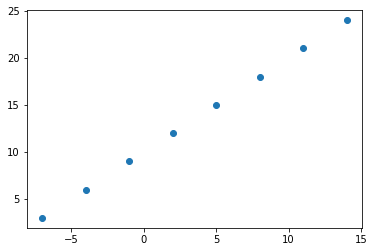

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

#Create features 
x= np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels 
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualization 
plt.scatter(x,y)

###Input and variables


In [ ]:
#Create a demo tensor fo our housing price prediction problem 
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price 

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = x.shape
output_shape= y.shape
input_shape, output.shape

NameError: ignored

In [ ]:
X = tf.cast(tf.constant(x), dtype= tf.float32 )
y = tf.cast(tf.constant(y), dtype= tf.float32 )
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,    output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow
1. **Creating a mode** - define the input and output layers, as well as the hidden layers of a deep learning model 
2. **Compiling a model** - define the loss funcition( in other word, the function which tells our model how grong it is) and the optimizer (tells our model how to improve the patterns it's learning) and evaluation metrics (what we can use to interpret the performance of our model). 
3. **Fitting a model** - letting the model try to find patterns between X&Y (features and labels) 



In [ ]:
# Set random seed 
tf.random.set_seed(42)

# 1 Create a model using the Sequential API 
model = tf.keras.Sequential([ 
  tf.keras.layers.Dense(2, input_shape=(1,))                                                          
])

# 2 Compile the model
model.compile(loss=tf.keras.losses.mae, #MAE IS FOR MEAN ABSOLUTE ERROR
              optimizer=tf.keras.optimizers.Adam(lr=1), #SGD means Stochastic Gradient Descent
              metrics=["mae"])
# 3 Fit the model 
model.fit(X, y, epochs=15)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 684ms/step - loss: 12.9775 - mae: 12.9775
Epoch 2/15
1/1 [==============================] - 0s 11ms/step - loss: 8.4775 - mae: 8.4775
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 7.6260 - mae: 7.6260
Epoch 4/15
1/1 [==============================] - 0s 10ms/step - loss: 8.4697 - mae: 8.4697
Epoch 5/15
1/1 [==============================] - 0s 15ms/step - loss: 7.0923 - mae: 7.0923
Epoch 6/15
1/1 [==============================] - 0s 8ms/step - loss: 4.8254 - mae: 4.8254
Epoch 7/15
1/1 [==============================] - 0s 10ms/step - loss: 4.1928 - mae: 4.1928
Epoch 8/15
1/1 [==============================] - 0s 8ms/step - loss: 4.3578 - mae: 4.3578
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 3.7759 - mae: 3.7759
Epoch 10/15
1/1 [==============================] - 0s 9ms/step - loss: 2.6085 - mae: 2.6085
Epoch 11/15
1/1 [==============================] - 0s 9ms/step - loss: 2.2508 - mae: 2.2508


In [ ]:
#Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 11

array([[23.71602]], dtype=float32)

##Improving a model 
We can improve our model, by altering the steps we took to create a model. 
1. **Creating a model** - here we might add more layers, increase the number of hidden units(all called neurons) within each of the hidden layers, change the activation function of each layer. 
2. **Compile the model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function. 
3. **Fitting a model**- Here we might fit a model for more **epochs** (leave it training for longer or on more data (give the model more examples to learn from) 

In [ ]:
# Let's rebuild our model 
# 1. Create the model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, input_shape = (1,)),
  tf.keras.layers.Dense(1)                    
])

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])
#3. Fit the model (With a longer time for training)
model.fit(X,y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 395ms/step - loss: 14.6466 - mae: 14.6466
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.9532 - mae: 13.9532
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2603 - mae: 13.2603
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.5659 - mae: 12.5659
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 11.8675 - mae: 11.8675
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 11.1621 - mae: 11.1621
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4475 - mae: 10.4475
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 9.7214 - mae: 9.7214
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 8.9817 - mae: 8.9817
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 8.2262 - mae: 8.2262
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 7

In [ ]:
#Remind ourselves of the data 
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#Let's see if the module prediction has improved 
y_predict = model.predict([35.0])
y_predict


array([[44.00906]], dtype=float32)

##Evaluating a model 
In practice, a typical workflow you'll go through when building a neural network is:
Build a model--> fit it --> evaluate it -->tweak a model --> fit it --> evalute it --> fit it ...


When it comes to evaluation... thera are 3 words you should memorize: 
> Visualize, Visualize and visualize 
It's a good idea to visualize: 
* The data - what data are we working with? What does it look like ? 
* The model itself - What does our model look like ? 
* The training of a model - how does the model perform while it learns ?
* The predictions of the model - how the model predictions perform against the original labels

In [ ]:
# Make a bigger dataset 
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

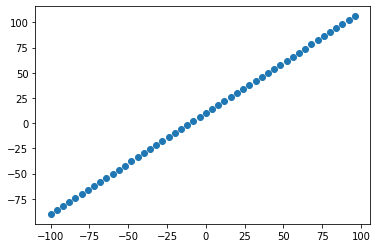

In [ ]:
#Visualize the data 
import matplotlib.pyplot as plt 

plt.scatter(X, y)

## The three sets (80% train set) and (20 % test set) 
* Training set -the model learns from this data whis is typically 70-80% of the total data you have available. 
* Validation set- the model gets tuned on this data, which is typically 10-15 % of the data available
* Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% 

In [ ]:
# Check the length of the data we have 
len(X)

50

In [ ]:
# Split the data into train and test sets 
X_train = X[:40] #First 40
X_test = X[40:] #Last 10 

y_train = y[:40] #First 40
y_test = y[40:] #Last 10 



### Visualize the data 
Now we've got our data in training and test sets... let's visualize it again 

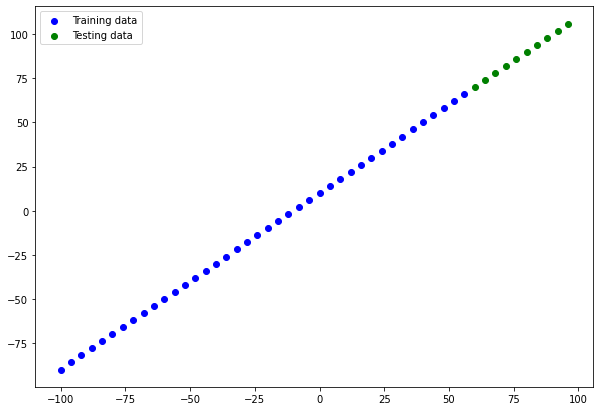

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue 
plt.scatter (X_train, y_train, c="b", label = "Training data")
# Plot test data in green 
plt.scatter (X_test, y_test, c="g", label = "Testing data")
# Show legend 
plt.legend();

In [ ]:
# Let's have a look how to build a neural network for our data
 
 #1. Create a model
model = tf.keras.Sequential([
   tf.keras.layers.Dense(1, input_shape = (1,), name="input_layer"),
   tf.keras.layers.Dense(1, name="output_layer")                           
 ])

 #2. Compile the model 
model.compile(loss = tf.keras.losses.mae, 
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
               metrics=["mae"])
# 3. Fit the modle 
model.fit(X_train, y_train, epochs=100, verbose=0) 

 

* Total params - total number of parameters in the model. 
* Trainable parameters - these are the parameters (patterns) the model can update as it trains)
* None-trainable params - These parameters arent't updated during training (this is typical when you bring parameters from other models during transfer learning)

##Visualizing the model 

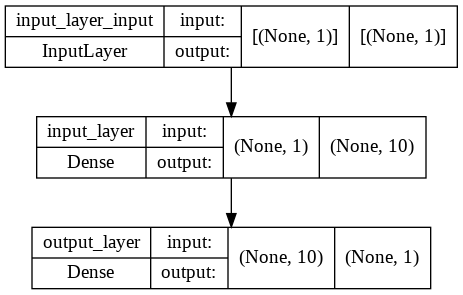

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our models predictions 
To visuaize predictions, it's a good idea to plot them against the ground truth labels. 
Often you'll see this in the fomr of y_test or t_true versys y_pred (ground truth versus your model) 


In [ ]:
#Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 71.21384 ],
       [ 75.28578 ],
       [ 79.35774 ],
       [ 83.42969 ],
       [ 87.50165 ],
       [ 91.57359 ],
       [ 95.64554 ],
       [ 99.7175  ],
       [103.789444],
       [107.86139 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to reuse some kinf of functuionality in future, it's a good idea to turn it into a function 

In [ ]:
# Let's create a ploting function
def plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground trouth
  """
  plt.figure(figsize=(10, 7))
  
  # Plot training data in blue 
  plt.scatter (train_data, train_labels, c="b", label = "Training data")
  # Plot test data in green 
  plt.scatter (test_data, test_labels, c="g", label = "Testing data")
  # Plot model's predictions in red
  plt.scatter (test_data, predictions, c="r", label="Predictions")
  # Show legend 
  plt.legend();    


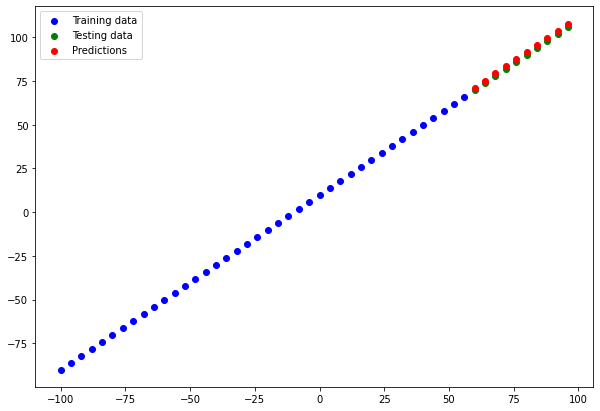

In [ ]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics
Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's preformance.

Since we're working on a regression two of the main metrics: 
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions" 
* MSE - mean square error, "square the average errors"
* Huber - Combination of MSE and MAE less sensitive to outliers than MSE.

In [ ]:
#Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 162ms/step - loss: 1.5376 - mae: 1.5376


[1.5376160144805908, 1.5376160144805908]

In [ ]:
# Calculate the mean absolute error 
mae=tf.metrics.mean_absolute_error(y_true=y_test,
                               y_pred=y_pred)

#Calculate the mean square error 
msa = tf.metrics.mean_squared_error(y_true=y_test,
                               y_pred=y_pred)
mae,msa

(<tf.Tensor: shape=(), dtype=float32, numpy=1.537616>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.4069724>)

In [ ]:
#Make some functions to reuse MAE and MSE 
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

In [ ]:
#We have to remember the shape of  the tensors in order to obtain the results expected
y_pred=tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 71.21384 ,  75.28578 ,  79.35774 ,  83.42969 ,  87.50165 ,
        91.57359 ,  95.64554 ,  99.7175  , 103.789444, 107.86139 ],
      dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

###Running experiments to improve our model 

To do this we need to 

1. Get more data - get more examplels for your model to train on (more opportunities to learn patterns or relationships between features and labels) 
2. Make your model larger (using a more complex model) this might come in the form of more layers or more hidden units in each layer. 
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments: 

1. 'model_1' - same as the original model, 1 layer trained for 100 epochs. 
2. "model_2' - 2 layers, trained for 100 epochs 
3. "model_3" - 2 layers, trained for 500 epochs

In [ ]:
#  Create model_1
#Set random seed
tf.random.set_seed()
#1. Create a model
model_1 = tf.keras.Sequential([
   tf.keras.layers.Dense(1, input_shape = (1,))                          
 ])

 #2. Compile the model 
model_1.compile(loss = tf.keras.losses.mae, 
               optimizer = tf.keras.optimizers.SGD(),
               metrics=["mae"])
# 3. Fit the modle 
model_1.fit(X_train, y_train, epochs=100) 

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

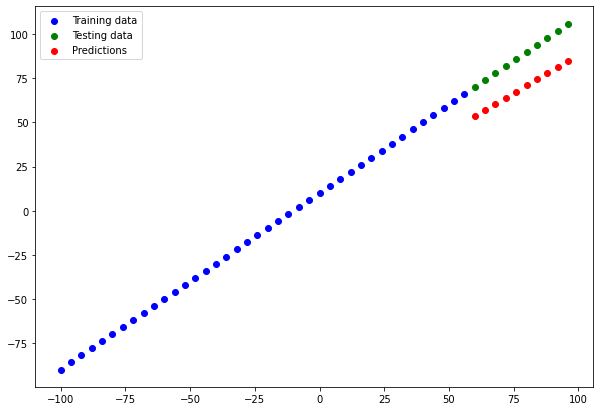

In [ ]:
#Make and plot predictions for model_1 
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
#Calculate model_1 evaluation metrics 
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [ ]:
X_train, y_train 

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
#  Create model_2
#1. Create a model
model_2 = tf.keras.Sequential([
   tf.keras.layers.Dense(2, input_shape = (1,)),
   tf.keras.layers.Dense(1)                          
 ])

 #2. Compile the model 
model_2.compile(loss = tf.keras.losses.mae, 
               optimizer = tf.keras.optimizers.SGD(),
               metrics=["mae"])
# 3. Fit the modle 
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 23.3094 - mae: 23.3094
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 19.0412 - mae: 19.0412
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 13.7974 - mae: 13.7974
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 17.4564 - mae: 17.4564
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 12.0705 - mae: 12.0705
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.8414 - mae: 9.8414
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 10.7142 - mae: 10.7142
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8784 - mae: 10.8784
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 38.1185 - mae: 38.1185
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 25.6860 - mae: 25.6860
Epoch 11/100
2/2 [==============================] - 0s 5ms/s

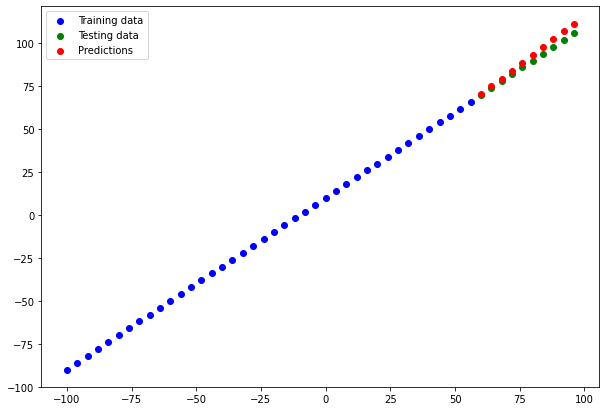

In [ ]:
#Make and plot predictions for model_ 
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
#Calculate model_1 evaluation metrics 
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.9790444>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.618595>)

In [ ]:
#  Create model_3
#1. Create a model
model_3 = tf.keras.Sequential([
   tf.keras.layers.Dense(2, input_shape = (1,)),
   tf.keras.layers.Dense(1)                          
 ])

 #2. Compile the model 
model_3.compile(loss = tf.keras.losses.mae, 
               optimizer = tf.keras.optimizers.SGD(),
               metrics=["mae"])
# 3. Fit the modle 
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 16.5300 - mae: 16.5300
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 14.6196 - mae: 14.6196
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 22.5454 - mae: 22.5454
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 23.5027 - mae: 23.5027
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 12.5315 - mae: 12.5315
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 10.1597 - mae: 10.1597
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0473 - mae: 11.0473
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 10.9839 - mae: 10.9839
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 39.5443 - mae: 39.5443
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 27.0568 - mae: 27.0568
Epoch 11/500
2/2 [==============================] - 0s 5ms/

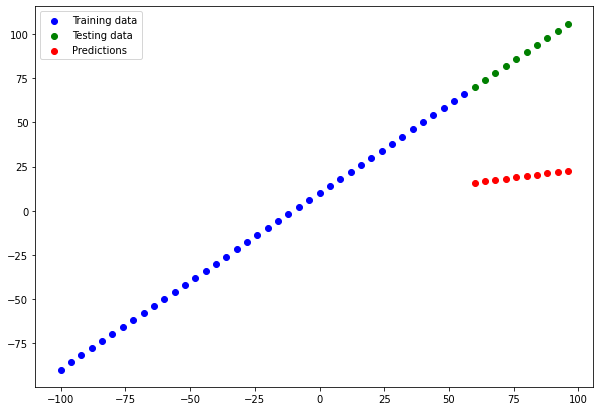

In [ ]:
#Make and plot predictions for model_ 
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
#Calculate model_1 evaluation metrics 
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.72518>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4809.651>)

** Note ** You want to start with small experiments (small models) and make sure they work and then increase complexity when needed  

### Comparing the results of our experiments 
We've run a few experiments, let's compare the results. 

In [ ]:
# let's compare our model's results using a pandas DataFrAME 
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_1", mae_2.numpy(), mse_2.numpy()],
                 ["model_1", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame (model_results, columns=["model", "mae", "mse"])

In [ ]:
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_1,2.979044,11.618595
2,model_1,68.725182,4809.650879


In [ ]:
model_2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 2)                 4         
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


##Tracking yourr experiments 
One really good habit in machine learning modelling is to trakc the results of your experiments. 
And when doing so, it can be tedious if you're running lots of ecperiments. 
Lyckily there are tools to help us ! 
**Resource** As you build more models, you'll want to look into using:
* TensorBoard - a component of the TensorFlow ibrary to help track modelling experiments
* Weights and biases - 

### Saving our models
Saving our modes so we can use in an app or mobile app
There are two main forms to save a model
1. The SavedMOdel 
2. The HDF5 form 

In [ ]:
#Save model using the SavedModel format 
model_2.save("best_model_SaveModel_format")

INFO:tensorflow:Assets written to: best_model_SaveModel_format/assets


In [ ]:
#Save model using the HFF5 format 
model_2.save("best_model_SaveModel_format.h5")

### A larger example

In [ ]:
#Import the required libraries 
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt 


In [ ]:
#Read in the insurance csv  dataset 
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance 


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#et's try one hot encode our DataFrame it's al numbers 
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#Create X & y values features and labels) 
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]



In [ ]:
#Create training and test sets (spllit arraysor matrixes into random train data )
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state=42)
len(X), len(X_train), len(X_test)
X_train.shape

(1070, 11)

In [ ]:
#Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

#1. Create a model 
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape =(11,)),
  tf.keras.layers.Dense(1)                                                                           
])

#2. Compile the model 
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
#Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
#Check the results of the insurance on the test data 
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

Improve the model, we'll run two experiments:
1. Add extra layer with more hidden units 
2. Train for longer 
3. Change the learning rate 

In [ ]:
#Set random seed 
tf.random.set_seed(42)

#1. Create the model 
insurance_model_2 = tf.keras.Sequential([
  #tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(2),
  tf.keras.layers.Dense(1)
])

#2. Compile the model 
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate= 0.5),
                          metrics=["mae"])
#3. Fit the model 
history = insurance_model_2.fit(X_train, y_train, epochs=200, verbose=1)

ValueError: ignored

In [ ]:
#Evaluate the model 
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3278.8901 - mae: 3278.8901


[3278.89013671875, 3278.89013671875]

Text(0.5, 0, 'epochs')

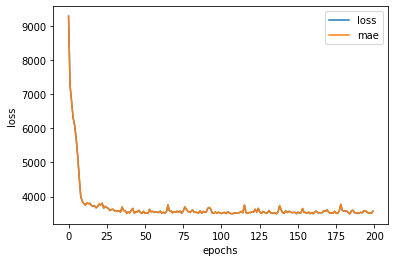

In [ ]:
#Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

To know how much time we need to train a model we can check the tool of tesnor flow called Earlystopping Callback, which is a TensorFlow component you can add to your model to stop improving a certain metric. 




### Preprocessing data (normalization and standarization) 
In terms or scaling, neural networks tend to prefer normalization. 
If you're not user in which to use you can try both and look which performs better. 


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 

#Read in the insurance csv  dataset 
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#We can use MinMaxScaler or StandardScaler

#Create a column transformer 
ct= make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
)

#Create X and y values 
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#Build our train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit the column transformer to our training data 
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal= ct.transform(X_test)

In [ ]:
#Original X data 
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
#Modified data
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
#Build a neural network model to fit on nour normalized data 

#1. Create the model 
insurance_model_4 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

#2. Compile the model 
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#Fit the model 
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.7764 - mae: 13343.7764
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13335.9307 - mae: 13335.9307
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13316.4561 - mae: 13316.4561
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13275.1865 - mae: 13275.1865
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13200.8271 - mae: 13200.8271
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13082.1299 - mae: 13082.1299
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12908.8281 - mae: 12908.8281
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12670.5059 - mae: 12670.5059
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12357.3486 - mae: 12357.3486
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11963.11

In [ ]:
#Evaluate our insurance model trained on normalized data 
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3443.3657 - mae: 3443.3657


[3443.36572265625, 3443.36572265625]

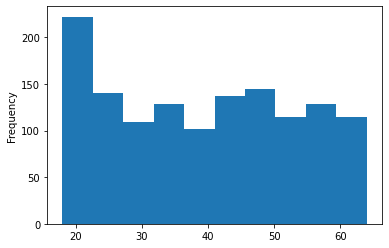

In [ ]:
X["age"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64